#### MOUNT

In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
# cd /content/drive/MyDrive/MICCAI_BraTS_2019_Data_Training

#### �씪�씠釉뚮윭由� 遺덈윭�삤湲�

In [38]:
import tensorboard

In [39]:
import os
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

from torchvision import transforms, datasets

# 1. �뜲�씠�꽣�뀑 �젙由�(�쟾泥섎━)

In [40]:
dir_data ='./dataset'

In [41]:
## train/test/val �뤃�뜑 �깮�꽦

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

### HGG �뙆�씪

In [42]:
# %pwd

In [43]:
import random

dataset_path = './drive/MyDrive/MICCIC_BraTS_2019_Data_Training'
hgg_path = dataset_path + "/HGG"


filename = os.listdir(hgg_path)
fielname = random.shuffle(filename)
filecount = len(filename)
HGG1 = round(filecount*0.8)
HGG2 = round(filecount*0.9)

In [44]:
# !pip install nibabel

In [45]:
import nibabel as nib

In [46]:
label_ = input_ = None
if not os.path.exists(dir_save_train):
    os.makedirs(dir_save_train)
    print('train �깮�꽦')

    # train
    train_filenames = filename[:HGG1]

    i=0
    for train_file in train_filenames:
        if train_file[0] == ".":
          continue
        i+=1
        for inner_train_file in os.listdir(hgg_path + "/" + train_file):
            if 'seg' in inner_train_file:
                img_label = nib.load(os.path.join(hgg_path,train_file, inner_train_file)).get_fdata()
                label_3d = np.array(img_label)
                label_ = label_3d[:,:,77]
                np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i),label_)

            #elif 'flair' or 't1' or 't1ce' or 't2' in b
            elif any(sub in inner_train_file for sub in ['flair', 't1', 't1ce', 't2']):
                img_input = nib.load(os.path.join(hgg_path,train_file, inner_train_file)).get_fdata()
                input_3d = np.array(img_input)
                input_ = input_3d[:,:,77]
                np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i),input_)

            else:
                print(f'{train_file}/{inner_train_file} : wrong')

In [47]:
if label_ and input_:
  # ## �씠誘몄�� �떆媛곹솕
  plt.subplot(122)
  plt.imshow(label_, cmap='gray')
  plt.title('label')

  plt.subplot(121)
  plt.imshow(input_, cmap='gray')
  plt.title('input')

  plt.show()

In [48]:
if label_ and input_:
  # ## �븳 �씠誘몄���쓽 遺꾪룷
  plt.subplot(122)
  plt.hist(label_.flatten(), bins=20)
  plt.title('label')

  plt.subplot(121)
  plt.hist(input_.flatten(), bins=20)
  plt.title('input')

  plt.tight_layout()
  plt.show()

In [49]:
if not os.path.exists(dir_save_val):
    os.makedirs(dir_save_val)
    print('val �깮�꽦')
    # val
    filename_val = filename[HGG1:HGG2]

    i=0
    for train_file in filename_val:
        i+=1
        for inner_train_file in os.listdir(hgg_path + '/' + train_file):
            if 'seg' in inner_train_file:
                img_label = nib.load(os.path.join(hgg_path,train_file, inner_train_file)).get_fdata()
                label_3d = np.array(img_label)
                label_ = label_3d[:,:,77]
                np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i),label_)
            #elif 'flair' or 't1' or 't1ce' or 't2' in b:
            elif any(sub in inner_train_file for sub in ['flair', 't1', 't1ce', 't2']):
                img_input = nib.load(os.path.join(hgg_path,train_file, inner_train_file)).get_fdata()
                input_3d = np.array(img_input)
                input_ = input_3d[:,:,77]
                np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i),input_)
            else:
                print(f'{train_file}/{inner_train_file} : wrong')

In [50]:
if not os.path.exists(dir_save_test):
    os.makedirs(dir_save_test)
    print('test �깮�꽦')

    # test
    filename_test = filename[HGG2:]

    i=0
    for train_file in filename_test:
        i+=1
        for inner_train_file in os.listdir(hgg_path + "/" + train_file):
            if 'seg' in inner_train_file:
                img_label = nib.load(os.path.join(hgg_path,train_file, inner_train_file)).get_fdata()
                label_3d = np.array(img_label)
                label_ = label_3d[:,:,77]
                np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i),label_)
            #elif 'flair' or 't1' or 't1ce' or 't2' in b:
            elif any(sub in inner_train_file for sub in ['flair', 't1', 't1ce', 't2']):
                img_input = nib.load(os.path.join(hgg_path,train_file, inner_train_file)).get_fdata()
                input_3d = np.array(img_label)
                input_ = label_3d[:,:,77]
                np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i),input_)
            else:
                print(f'{train_file}/{inner_train_file} : wrong')

## U-Net �꽕�듃�썙�겕 援ъ텞�븯湲�

In [51]:
## �씪�씠釉뚮윭由� 遺덈윭�삤湲�
import os
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt

from torchvision import transforms, datasets

## �꽕�듃�썙�겕 援ъ텞�븯湲�
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Convolution + BatchNormalization + Relu �젙�쓽�븯湲�
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)
            # nn.Sequential �겢�옒�뒪 : nn.ReLU �벑�쓽 紐⑤뱢�뱾�쓣 �씤�닔濡� 諛쏆븘�꽌 �닚�꽌���濡� �젙�젹�빐�넃怨�
            #�엯�젰媛믪씠 �뱾�뼱�삤硫�, �닚�꽌���濡� 臾섎뱢 �떎�뻾�빐�꽌 寃곌낵媛� 由ы꽩
            # 由ъ뒪�듃 �씠由꾩뿉 蹂� 遺숈뿬�빞�븿

            return cbr

        # �닔異� 寃쎈줈(Contracting path)
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # �솗�옣 寃쎈줈(Expansive path)
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

    # forward �븿�닔 �젙�쓽�븯湲�
    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

In [52]:
#!pip install segmentation_models_pytorch

In [53]:
import segmentation_models_pytorch as smp

TS_Net = smp.Unet(
    encoder_name="resnet34", 
    encoder_weights="imagenet",
    activation='sigmoid',
    in_channels=1,
    classes=1)

def make_TS_Net():
  return smp.Unet(
    encoder_name="resnet34", 
    encoder_weights="imagenet",
    activation='sigmoid',
    in_channels=1,
    classes=1)

# 3-1. DataLoader

#### : �꽕�듃�썙�겕�뿉 �뜲�씠�꽣瑜� �삱由ш린 �쐞�빐 DataLoader濡� 援ы쁽

In [54]:
# 데이터 로더를 구현하기
class Dataset(torch.utils.data.Dataset): #torch.utils.data.Dataset 상속
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        lst_data = os.listdir(self.data_dir)

        lst_label = [f for f in lst_data if f.startswith('label')]
        lst_input = [f for f in lst_data if f.startswith('input')]

        #정렬(오름차순)
        lst_label.sort()
        lst_input.sort()

        self.lst_label = lst_label
        self.lst_input = lst_input
        
    def update_cropped_data(self, net):
        # TODO: net을 매개변수로 받는 것이 아니라, 이전 모델의 출력 값을 받아서 이후에 __getitem__에서 꺼내쓸 수 있도록 조치
        # Update cropped data based on network prediction
        cropped_data = []
        for data_item in self.data:
            input = data_item['input']
            # Assuming input is tensor, you might need some adjustments based on your data format
            output = net(input)
            cropped_segment = self.crop_segment(output)
            cropped_data.append({'input': cropped_segment})
        self.cropped_data = cropped_data

    def __len__(self):
        return len(self.lst_label)

    def __getitem__(self, index):
        label = np.load(os.path.join(self.data_dir, self.lst_label[index]))
        input = np.load(os.path.join(self.data_dir, self.lst_input[index]))
        # TODO: 필요하다면, crop 부분 추가

        # 정규화
        label = label/255.0
        input = input/255.0

        # 이미지와 레이블의 차원 = 2일 경우(채널이 없을 경우, 흑백 이미지), 새로운 채널(축) 생성
        if label.ndim == 2:
            label = label[:, :, np.newaxis]
        if input.ndim == 2:
            input = input[:, :, np.newaxis]

        self.data = {'input': input, 'label': label}

        # transform이 정의되어 있다면 transform을 거친 데이터를 불러옴
        if self.transform:
            self.data["input"] = self.transform(self.data["input"])

        return self.data

In [55]:
# �뜲�씠�꽣濡쒕뜑 �옒 援ы쁽�릺�뿀�뒗吏� �솗�씤
dataset_train = Dataset(data_dir=dir_save_train)
data = dataset_train.__getitem__(0) # �븳 �씠誘몄�� 遺덈윭�삤湲�
input = data['input']
label = data['label']

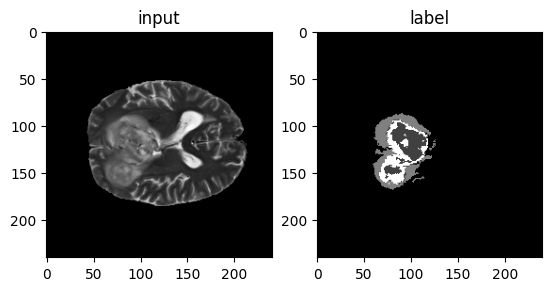

In [56]:
# 遺덈윭�삩 �씠誘몄�� �떆媛곹솕
plt.subplot(122)
plt.imshow(label.reshape(240,240), cmap='gray')
plt.title('label')

plt.subplot(121)
plt.imshow(input.reshape(240,240), cmap='gray')
plt.title('input')

plt.show()

## 3-2.Transform

- ToTensor : numpy�뿉�꽌 tensor濡� �뜲�씠�꽣 type�쓣 蹂�寃�
- Normalization : �뜲�씠�꽣 �젙洹쒗솕
- RandomFlip : �옖�뜡 醫뚯슦 諛� �긽�븯 諛섏쟾
- ResizeImage : �씠誘몄�� �궗�씠利� 蹂�寃�

In [57]:
# �듃�젋�뒪�뤌 援ы쁽�븯湲�
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms


class Grayscale(object):
    def __init__(self, num_output_channels):
        self.num_output_channels = num_output_channels

    def __call__(self, data):
        label, input = data['label'], data['input']

        # �씠誘몄��媛� �쓳諛깆씠 �븘�땶 寃쎌슦�뿉留� 蹂��솚 �쟻�슜
        if label.shape[0] != 1 and label.shape[0] != 3:
            grayscale_transform = transforms.Grayscale(num_output_channels=self.num_output_channels)
            label = grayscale_transform(label)
            input = grayscale_transform(input)

        data = {'label': label, 'input': input}

        return data

class ToTensor(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        label = label.transpose((2, 0, 1)).astype(np.float32)
        input = input.transpose((2, 0, 1)).astype(np.float32)

        data = {'label': torch.from_numpy(label), 'input': torch.from_numpy(input)}

        return data

class ResizeImage:
    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, data):
        label, input = data['label'], data['input']

        # �씠誘몄�� �겕湲� 蹂�寃�
        label = F.interpolate(label.unsqueeze(0), size=self.output_size, mode='bilinear', align_corners=False)
        label = label.squeeze(0)

        input = F.interpolate(input.unsqueeze(0), size=self.output_size, mode='bilinear', align_corners=False)
        input = input.squeeze(0)

        data = {'label': label, 'input': input}

        return data

class MinMaxNormalization(object):
    def __init__(self, min_val=0, max_val=1):
        self.min_val = min_val
        self.max_val = max_val

    def __call__(self, data):
        label, input = data['label'], data['input']

        input = (input - input.min()) / (input.max() - input.min())
        input = input * (self.max_val - self.min_val) + self.min_val

        data = {'label': label, 'input': input}

        return data


In [58]:
from scipy.ndimage import rotate, gaussian_filter, gaussian_filter1d, map_coordinates        

class FlipRot(object):
    def __call__(self, data):
        label, input = data['label'], data['input']

        # rotation [0, 45]
        if np.random.rand() > 0.5:
          angle = 45
          label = rotate(label, angle, reshape=False, mode="nearest")
          input = rotate(input, angle, reshape=False, mode="nearest")

        # �닔�룊 �뮘吏묎린 
        if np.random.rand() > 0.5:
            label = np.flipud(label)
            input = np.flipud(input)

        data = {'label': label, 'input': input}

        return data

class ElasticTransformation(object):
    def __init__(self, alpha_range, sigma_range):
        self.alpha_range = alpha_range
        self.sigma_range = sigma_range

    def __call__(self, data):
        label, input = data['label'], data['input']

        alpha = np.random.uniform(*self.alpha_range)
        sigma = np.random.uniform(*self.sigma_range)

        random_field = gaussian_filter(np.random.randn(*input.shape), sigma, mode="constant", cval=0) * alpha
        displacement = np.array([gaussian_filter1d(random_field, sigma, axis=i) for i in range(random_field.ndim)])

        label = map_coordinates(label, displacement, order=1, mode='reflect')
        input = map_coordinates(input, displacement, order=3, mode='reflect')

        data = {'label': label, 'input': input}

        return data
    
class GammaCorrection(object):
    def __init__(self, gamma_range):
        self.gamma_range = gamma_range

    def __call__(self, data):
        label, input = data['label'], data['input']

        gamma = np.random.uniform(*self.gamma_range)
        input = input ** gamma

        data = {'label': label, 'input': input}

        return data

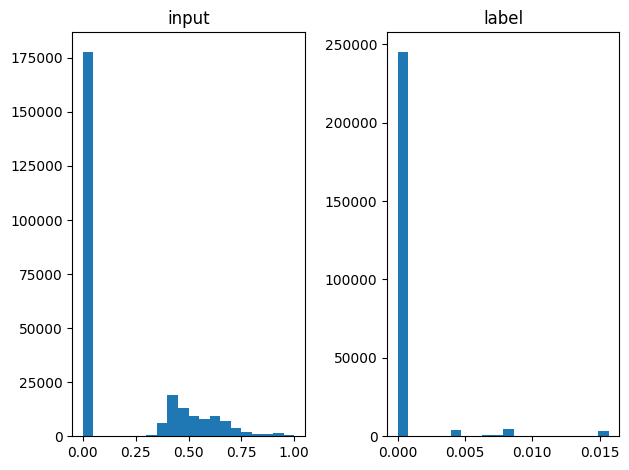

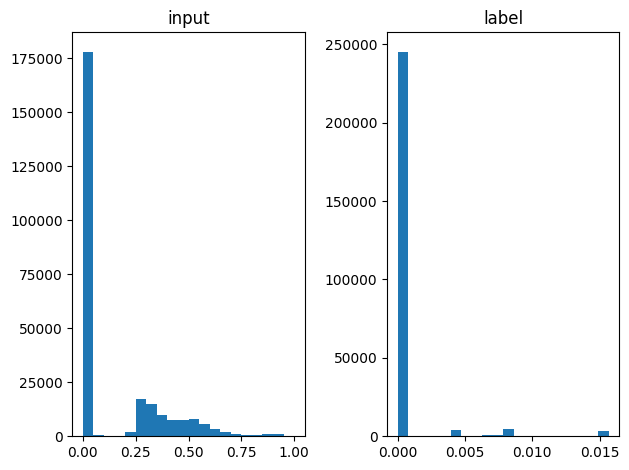

In [59]:
# 트랜스폼 잘 구현되었는지 확인
# transform = transforms.Compose([ToTensor(),
#                                 #Grayscale(num_output_channels=1),
#                                 ResizeImage(output_size=(512,512)),
#                                 MinMaxNormalization()])


# 트랜스폼 잘 구현되었는지 확인
# transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), FlipRot(), ElasticTransformation(alpha_range=(0, 100), sigma_range=(10, 20)), GammaCorrection(gamma_range=(0.4, 1.2)), ToTensor()])

# transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), ElasticTransformation(alpha_range=(0, 100), sigma_range=(10, 20)), ToTensor()])
transform = transforms.Compose([ #ToTensor(),
                                # Normalization(mean=0.5, std=0.5), 
                                ToTensor(),
                                # FlipRot(), 
                                GammaCorrection(gamma_range=(0.4, 1.2)), 
                                ResizeImage(output_size=(512,512)),
                                MinMaxNormalization()])
dataset_train = Dataset(data_dir=dir_save_train, transform=transform)
data = dataset_train.__getitem__(0) # 한 이미지 불러오기
input = data['input']
label = data['label']

# 불러온 이미지 시각화
plt.subplot(122)
plt.hist(label.flatten(), bins=20)
plt.title('label')

plt.subplot(121)
plt.hist(input.flatten(), bins=20)
plt.title('input')

plt.tight_layout()
plt.show()


dataset_train = Dataset(data_dir=dir_save_train, transform=transform)
data = dataset_train.__getitem__(0) # 한 이미지 불러오기
input = data['input']
label = data['label']

# 불러온 이미지 시각화
plt.subplot(122)
plt.hist(label.flatten(), bins=20)
plt.title('label')

plt.subplot(121)
plt.hist(input.flatten(), bins=20)
plt.title('input')

plt.tight_layout()
plt.show()

1.0 0.0
0.01568627543747425 0.0


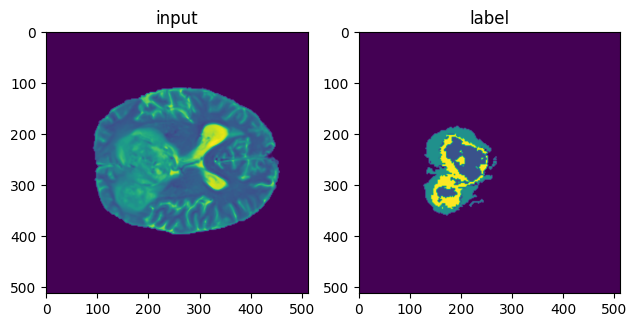

In [60]:
plt.subplot(121)
plt.imshow(input[0,:,:])
plt.title('input')

plt.subplot(122)
plt.imshow(label[0,:,:])
plt.title('label')

print(input[0,:,:].max().item(), input[0,:,:].min().item())
print(label[0,:,:].max().item(), label[0,:,:].min().item())

plt.tight_layout()
plt.show()

In [61]:
label.size()

torch.Size([1, 512, 512])

## 4. �꽕�듃�썙�겕 ����옣/遺덈윭�삤�뒗 �븿�닔 �젙�쓽�븯湲�

In [62]:
## �꽕�듃�썙�겕 ����옣�븯湲�
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               "%s/model_epoch%d.pth" % (ckpt_dir, epoch))

## �꽕�듃�썙�겕 遺덈윭�삤湲�
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)
    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[-1]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch

## 5. �꽕�듃�썙�겕 �썕�젴�븯湲�

In [63]:
# 훈련 파라미터 설정하기
param = {
    "model": "tsnet", # unet, tsnet
    "aug": "g", # 아래 transform에 맞게 변경
    "device": "cpu",
    "loss": "BCE", # "MSE", "BCE"
    "optimizer": "Adam", # (Adam, SGD)
    "scheduler": "LambdaLR_0.995", #(None,LambdaLR_[계수], MultiplicativeLR_[계수], StepLR_[step_size]_[gamma])
    "learning_rate": 1e-3,
    "training_epochs": 20,
    "batch_size": 4,
    "num_workers": 0
    }

base_dir = f'./runs/{param["model"]}_{param["aug"]}_{param["loss"]}_{param["optimizer"]}_{param["scheduler"]}_{param["learning_rate"]}_{param["training_epochs"]}_{param["batch_size"]}'
data_dir = dir_data
ckpt_dir = os.path.join(base_dir, "checkpoint")
log_dir = os.path.join(base_dir, "log")



In [64]:

# dataset_train = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
# loader_train = DataLoader(dataset_train, batch_size=param["batch_size"], shuffle=True, num_workers=param["num_workers"])

# dataset_val = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
# loader_val = DataLoader(dataset_val, batch_size=param["batch_size"], shuffle=False, num_workers=param["num_workers"])

# 훈련을 위한 Transform과 DataLoader
transform = transforms.Compose([ToTensor(),
                                # Normalization(mean=0.5, std=0.5),
                                # FlipRot(), 
                                GammaCorrection(gamma_range=(0.4, 1.2)), 
                                ResizeImage(output_size=(512,512)),
                                MinMaxNormalization()])

# Whole Tumor Dataset
dataset_train_whole_tumor = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train_whole_tumor = DataLoader(dataset_train_whole_tumor, batch_size=param["batch_size"], shuffle=True, num_workers=param["num_workers"])

dataset_val_whole_tumor = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val_whole_tumor = DataLoader(dataset_val_whole_tumor, batch_size=param["batch_size"], shuffle=False, num_workers=param["num_workers"])

# Tumor Core Dataset
dataset_train_tumor_core = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train_tumor_core = DataLoader(dataset_train_tumor_core, batch_size=param["batch_size"], shuffle=True, num_workers=param["num_workers"])

dataset_val_tumor_core = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val_tumor_core = DataLoader(dataset_val_tumor_core, batch_size=param["batch_size"], shuffle=False, num_workers=param["num_workers"])

# Enhancing Tumor Core Dataset
dataset_train_enhancing_tumor_core = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train_enhancing_tumor_core = DataLoader(dataset_train_enhancing_tumor_core, batch_size=param["batch_size"], shuffle=True, num_workers=param["num_workers"])

dataset_val_enhancing_tumor_core = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val_enhancing_tumor_core = DataLoader(dataset_val_enhancing_tumor_core, batch_size=param["batch_size"], shuffle=False, num_workers=param["num_workers"])



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 네트워크 생성하기
if param["model"] == "unet":
    net_whole_tumor = UNet().to(device) 
    net_tumor_core = UNet().to(device)
    net_enhancing_tumor_core = UNet().to(device)
elif param["model"] == "tsnet":
    net_whole_tumor = make_TS_Net().to(device)
    net_tumor_core = make_TS_Net().to(device)
    net_enhancing_tumor_core = make_TS_Net().to(device)

# Define the loss function and optimizer
if param["loss"] == "MSE":
    fn_loss = nn.MSELoss().to(device)
elif param["loss"] == "BCE":
    fn_loss = nn.BCEWithLogitsLoss().to(device)
else:
    print("올바른 loss function을 설정해주세요. (MSE)")

# Optimizer 설정하기
if param["optimizer"] == "Adam":
    optim_whole_tumor = torch.optim.Adam(net_whole_tumor.parameters(), lr=param["learning_rate"])
    optim_tumor_core = torch.optim.Adam(net_tumor_core.parameters(), lr=param["learning_rate"])
    optim_enhancing_tumor_core = torch.optim.Adam(net_enhancing_tumor_core.parameters(), lr=param["learning_rate"])
elif param["optimizer"] == "SGD":
    optim_whole_tumor = torch.optim.SGD(net_whole_tumor.parameters() , lr=param["learning_rate"])
    optim_tumor_core = torch.optim.SGD(net_tumor_core.parameters() , lr=param["learning_rate"])
    optim_enhancing_tumor_core = torch.optim.SGD(net_enhancing_tumor_core.parameters() , lr=param["learning_rate"])
else:
    print("올바른 optimizer를 입력해 주세요. (Adam, SGD)")

# Scheduler 설정하기
if param["scheduler"] == "None":
    scheduler_whole_tumor = False
    scheduler_tumor_core = False
    scheduler_enhancing_tumor_core = False
elif param["scheduler"].split("_")[0] == "LambdaLR":
    lambda_coefficient = float(param["scheduler"].split("_")[1])
    scheduler_whole_tumor = torch.optim.lr_scheduler.LambdaLR(optimizer=optim_whole_tumor, lr_lambda=lambda epoch: lambda_coefficient ** epoch)
    scheduler_tumor_core = torch.optim.lr_scheduler.LambdaLR(optimizer=optim_tumor_core, lr_lambda=lambda epoch: lambda_coefficient ** epoch)
    scheduler_enhancing_tumor_core = torch.optim.lr_scheduler.LambdaLR(optimizer=optim_enhancing_tumor_core, lr_lambda=lambda epoch: lambda_coefficient ** epoch)
elif param["scheduler"].split("_")[0] == "MultiplicativeLR":
    lambda_coefficient = float(param["scheduler"].split("_")[1])
    scheduler_whole_tumor = torch.optim.lr_scheduler.MultiplicativeLR(optimizer=optim_whole_tumor, lr_lambda=lambda epoch: lambda_coefficient ** epoch)
    scheduler_tumor_core = torch.optim.lr_scheduler.MultiplicativeLR(optimizer=optim_tumor_core, lr_lambda=lambda epoch: lambda_coefficient ** epoch)
    scheduler_enhancing_tumor_core = torch.optim.lr_scheduler.MultiplicativeLR(optimizer=optim_enhancing_tumor_core, lr_lambda=lambda epoch: lambda_coefficient ** epoch)
elif param["scheduler"].split("_")[0] == "StepLR":
    param_scheduler = param["scheduler"].split("_")
    step_size = int(param_scheduler[1])
    gamma = float(param_scheduler[2])
    scheduler_whole_tumor = torch.optim.lr_scheduler.StepLR(optim_whole_tumor, step_size=step_size, gamma=gamma)
    scheduler_tumor_core = torch.optim.lr_scheduler.StepLR(optim_tumor_core, step_size=step_size, gamma=gamma)
    scheduler_enhancing_tumor_core = torch.optim.lr_scheduler.StepLR(optim_enhancing_tumor_core, step_size=step_size, gamma=gamma)
else:
    scheduler_whole_tumor = False
    scheduler_tumor_core = False
    scheduler_enhancing_tumor_core = False
    print("올바른 스케줄러를 입력하세요. (None, LambdaLR_[계수], MultiplicativeLR_[계수], StepLR_[step_size]_[gamma])")


# 그밖에 부수적인 variables 설정하기
num_data_train = len(dataset_train_whole_tumor)
num_data_val = len(loader_train_whole_tumor)

num_batch_train = np.ceil(num_data_train / param["batch_size"])
num_batch_val = np.ceil(num_data_val / param["batch_size"])

# 그 밖에 부수적인 functions 설정하기
fn_tonumpy = lambda x: x.to('cpu').detach().numpy().transpose(0, 2, 3, 1)
fn_denorm = lambda x, mean, std: (x * std) + mean
fn_class = lambda x: 1.0 * (x > 0.5)

In [65]:
# Tensorboard 瑜� �궗�슜�븯湲� �쐞�븳 SummaryWriter �꽕�젙
writer_train = SummaryWriter(log_dir=os.path.join(log_dir, 'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir, 'val'))

In [66]:
# 네트워크 학습시키기
st_epoch = 0
# 학습한 모델이 있을 경우 모델 로드하기
# net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

In [ ]:
def crop_input_based_on_output(input_image, output_whole_tumor, label_whole_tumor, threshold=0.5):
    # 이 함수에서 input_image는 첫 번째 모델의 입력 이미지입니다.
    # output_whole_tumor는 첫 번째 모델의 출력입니다.
    # label_whole_tumor는 첫 번째 모델의 정답 레이블입니다.
    # threshold는 임계값으로, 기본값은 0.5입니다.

    # 여기서 output_whole_tumor를 기반으로 입력 이미지를 잘라내거나 크기를 조정하여 
    # 두 번째 모델인 tumor core 모델의 입력으로 생성합니다.

    # 예시: output_whole_tumor를 기준으로 입력 이미지를 crop하는 방법
    # 예시에서는 output_whole_tumor가 바이너리 세그멘테이션 맵으로 가정합니다.
    # 세그멘테이션 맵을 기반으로 입력 이미지를 crop하여 반환합니다.

    # 세그멘테이션 맵에서 유효한 영역을 가져옵니다.
    valid_area = output_whole_tumor > threshold

    # 세그멘테이션 맵을 기반으로 입력 이미지를 crop합니다.
    # 여기서는 PyTorch의 indexing을 사용하여 crop할 수 있습니다.
    cropped_input_image = input_image[:, valid_area]

    # 반환된 crop된 이미지를 tumor core 모델의 입력으로 사용합니다.
    return cropped_input_image, label_whole_tumor[:, valid_area]  # label_whole_tumor도 동일한 영역으로 잘라내어야 합니다.

In [ ]:
def train_model(net, optimizer, scheduler, data_loader, writer, epoch, phase):
    net.train() if phase == 'train' else net.eval()
    loss_arr = []

    for batch, data in enumerate(data_loader, 1):
        label = data['label'].to(device)
        input = data['input'].to(device)

        output = net(input)

        if phase == 'train':
            optimizer.zero_grad()

        loss = fn_loss(output, label)
        if phase == 'train':
            loss.backward()
            optimizer.step()

        loss_arr += [loss.item()]

        print("%s: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
              (phase.upper(), epoch, param["training_epochs"], batch, len(data_loader), np.mean(loss_arr)), end="")
        if scheduler and phase == 'train':
            print(" | LR",*scheduler.get_last_lr())
        elif phase == 'train':
            print(" | LR",optimizer.param_groups[0]['lr'])
        else:
            print()

        label = fn_tonumpy(label)
        input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
        output = fn_tonumpy(fn_class(output))

        writer.add_image('label', label, len(data_loader) * (epoch - 1) + batch, dataformats='NHWC')
        writer.add_image('input', input, len(data_loader) * (epoch - 1) + batch, dataformats='NHWC')
        writer.add_image('output', output, len(data_loader) * (epoch - 1) + batch, dataformats='NHWC')
    if scheduler and phase == 'train':
      scheduler.step()
      writer.add_scalar('learning_rate', *scheduler.get_last_lr())
    elif phase == 'train':
      writer.add_scalar('learning_rate', optimizer.param_groups[0]['lr'])
    writer.add_scalar('loss', np.mean(loss_arr), epoch)


# Training loop
for epoch in range(st_epoch + 1, param["training_epochs"] + 1):
    train_model(net_whole_tumor, optim_whole_tumor, scheduler_whole_tumor, loader_train_whole_tumor, writer_train, epoch, 'train')
    train_model(net_whole_tumor, None, None, loader_val_whole_tumor, writer_val, epoch, 'val')
    
    # Apply crop and forward the cropped output to the next model
    loader_train_tumor_core.dataset.update_cropped_data(net_whole_tumor)
    train_model(net_tumor_core, optim_tumor_core, scheduler_tumor_core, loader_train_tumor_core, writer_train, epoch, 'train')
    train_model(net_tumor_core, None, None, loader_val_tumor_core, writer_val, epoch, 'val')

    # Apply crop and forward the cropped output to the next model
    loader_train_enhancing_tumor_core.dataset.update_cropped_data(net_tumor_core)
    train_model(net_enhancing_tumor_core, optim_enhancing_tumor_core, scheduler_enhancing_tumor_core, loader_train_enhancing_tumor_core, writer_train, epoch, 'train')
    train_model(net_enhancing_tumor_core, None, None, loader_val_enhancing_tumor_core, writer_val, epoch, 'val')

    # Save models every 50 epochs
    if epoch % 50 == 0:
        save(ckpt_dir=ckpt_dir, net=net_whole_tumor, optim=optim_whole_tumor, epoch=epoch)
        save(ckpt_dir=ckpt_dir, net=net_tumor_core, optim=optim_tumor_core, epoch=epoch)
        save(ckpt_dir=ckpt_dir, net=net_enhancing_tumor_core, optim=optim_enhancing_tumor_core, epoch=epoch)

# Close writers
writer_train.close()
writer_val.close()

In [ ]:
def train_model(net, optimizer, scheduler, data_loader, writer, epoch, phase):
    net.train() if phase == 'train' else net.eval()
    loss_arr = []

    for batch, data in enumerate(data_loader, 1):
        label = data['label'].to(device)
        input = data['input'].to(device)

        if phase == 'train':
            optimizer.zero_grad()

        output = net(input)

        # If in training phase, use output for the next model
        if phase == 'train':
            cropped_input = crop_input_based_on_output(input, output)
            next_model_output = net(cropped_input)
            loss = fn_loss(next_model_output, label)
            loss.backward()
            optimizer.step()
        else:
            loss = fn_loss(output, label)

        loss_arr += [loss.item()]

        print("%s: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
              (phase.upper(), epoch, param["training_epochs"], batch, len(data_loader), np.mean(loss_arr)), end="")
        if scheduler and phase == 'train':
            print(" | LR",*scheduler.get_last_lr())
        elif phase == 'train':
            print(" | LR",optimizer.param_groups[0]['lr'])
        else:
            print()

        label = fn_tonumpy(label)
        input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
        output = fn_tonumpy(fn_class(output))

        writer.add_image('label', label, len(data_loader) * (epoch - 1) + batch, dataformats='NHWC')
        writer.add_image('input', input, len(data_loader) * (epoch - 1) + batch, dataformats='NHWC')
        writer.add_image('output', output, len(data_loader) * (epoch - 1) + batch, dataformats='NHWC')
    if scheduler and phase == 'train':
      scheduler.step()
      writer.add_scalar('learning_rate', *scheduler.get_last_lr())
    elif phase == 'train':
      writer.add_scalar('learning_rate', optimizer.param_groups[0]['lr'])
    writer.add_scalar('loss', np.mean(loss_arr), epoch)


# Training loop
for epoch in range(st_epoch + 1, param["training_epochs"] + 1):
    train_model(net_whole_tumor, optim_whole_tumor, scheduler_whole_tumor, loader_train_whole_tumor, writer_train, epoch, 'train')
    train_model(net_whole_tumor, None, None, loader_val_whole_tumor, writer_val, epoch, 'val')
    
    # Train and validate tumor core model
    train_model(net_tumor_core, optim_tumor_core, scheduler_tumor_core, loader_train_tumor_core, writer_train, epoch, 'train')
    train_model(net_tumor_core, None, None, loader_val_tumor_core, writer_val, epoch, 'val')

    # Train and validate enhancing tumor core model
    train_model(net_enhancing_tumor_core, optim_enhancing_tumor_core, scheduler_enhancing_tumor_core, loader_train_enhancing_tumor_core, writer_train, epoch, 'train')
    train_model(net_enhancing_tumor_core, None, None, loader_val_enhancing_tumor_core, writer_val, epoch, 'val')

    # Save models every 50 epochs
    if epoch % 50 == 0:
        save(ckpt_dir=ckpt_dir, net=net_whole_tumor, optim=optim_whole_tumor, epoch=epoch)
        save(ckpt_dir=ckpt_dir, net=net_tumor_core, optim=optim_tumor_core, epoch=epoch)
        save(ckpt_dir=ckpt_dir, net=net_enhancing_tumor_core, optim=optim_enhancing_tumor_core, epoch=epoch)

# Close writers
writer_train.close()
writer_val.close()


In [ ]:
# 첫번째 모델의 출력을 사용하여 두번째 모델의 입력을 생성하고 학습, 두번째 모델의 출력을 사용하여 세번째 모델의 입력을 생성하고 학습
for epoch in range(st_epoch + 1, param["training_epochs"] + 1):
    net_whole_tumor.train()
    net_tumor_core.train()
    net_enhancing_tumor_core.train()  # Enhancing tumor core 모델도 학습 상태로 설정
    loss_arr_whole_tumor = []
    loss_arr_tumor_core = []
    loss_arr_enhancing_tumor_core = []

    for batch, data in enumerate(loader_train_whole_tumor, 1):
        # forward pass
        label_whole_tumor = data['label'].to(device)
        input_whole_tumor = data['input'].to(device)

        # Get output of whole tumor model
        output_whole_tumor = net_whole_tumor(input_whole_tumor)

        # Crop input based on whole tumor model output
        input_tumor_core, label_tumor_core = crop_input_based_on_output(input_whole_tumor, label_whole_tumor, output_whole_tumor)

        # Forward pass for tumor core model
        output_tumor_core = net_tumor_core(input_tumor_core)

        # Crop input based on tumor core model output
        input_enhancing_tumor_core, label_enhancing_tumor_core = crop_input_based_on_output(input_tumor_core, label_tumor_core, output_tumor_core)

        # Forward pass for enhancing tumor core model
        output_enhancing_tumor_core = net_enhancing_tumor_core(input_enhancing_tumor_core)

        # Backward pass for enhancing tumor core model
        optim_enhancing_tumor_core.zero_grad()
        loss_enhancing_tumor_core = fn_loss(output_enhancing_tumor_core, label_enhancing_tumor_core)
        loss_enhancing_tumor_core.backward()
        optim_enhancing_tumor_core.step()

        # Backward pass for tumor core model
        optim_tumor_core.zero_grad()
        loss_tumor_core = fn_loss(output_tumor_core, label_tumor_core)
        loss_tumor_core.backward()
        optim_tumor_core.step()

        # Backward pass for whole tumor model
        optim_whole_tumor.zero_grad()
        loss_whole_tumor = fn_loss(output_whole_tumor, label_whole_tumor)
        loss_whole_tumor.backward()
        optim_whole_tumor.step()

        loss_arr_whole_tumor.append(loss_whole_tumor.item())
        loss_arr_tumor_core.append(loss_tumor_core.item())
        loss_arr_enhancing_tumor_core.append(loss_enhancing_tumor_core.item())

        print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | WT_LOSS %.4f | TC_LOSS %.4f | ETC_LOSS %.4f" %
              (epoch, param["training_epochs"], batch, len(loader_train_whole_tumor), np.mean(loss_arr_whole_tumor), np.mean(loss_arr_tumor_core), np.mean(loss_arr_enhancing_tumor_core)))

        # Tensorboard 저장하기
        if param["scheduler"] != "None":
            scheduler_whole_tumor.step()
            scheduler_tumor_core.step()
            scheduler_enhancing_tumor_core.step()
            writer_train.add_scalar('learning_rater_whole_tumor', *scheduler_whole_tumor.get_last_lr())
            writer_train.add_scalar('learning_rate_tumor_core', *scheduler_tumor_core.get_last_lr())
            writer_train.add_scalar('learning_rater_enhancing_tumor_core', *scheduler_enhancing_tumor_core.get_last_lr())
        else:
            writer_train.add_scalar('learning_rater_whole_tumor', optim_whole_tumor.param_groups[0]['lr'])
            writer_train.add_scalar('learning_rate_tumor_core', optim_tumor_core.param_groups[0]['lr'])
            writer_train.add_scalar('learning_rater_enhancing_tumor_core', optim_enhancing_tumor_core.param_groups[0]['lr'])
        writer_train.add_scalar('loss_whole_tumor', np.mean(loss_arr_whole_tumor), epoch)
        writer_train.add_scalar('loss_tumor_core', np.mean(loss_arr_tumor_core), epoch)
        writer_train.add_scalar('loss_enhancing_tumor_core', np.mean(loss_arr_enhancing_tumor_core), epoch)

    # 이하 validation 코드도 위와 동일한 방식으로 수정
    # 생략


## 6. 훈련된 모델 테스트하기

In [ ]:
# TODO: Validation 코드 수정

transform = transforms.Compose([ToTensor(),
                                ResizeImage(output_size=(512,512)),
                                MinMaxNormalization()])

dataset_test = Dataset(data_dir=os.path.join(data_dir, 'test'), transform=transform)
loader_test = DataLoader(dataset_test, batch_size=param["batch_size"], shuffle=False, num_workers=param["num_workers"])

# 그밖에 부수적인 variables 설정하기
num_data_test = len(dataset_test)
num_batch_test = np.ceil(num_data_test / param["batch_size"])

# 결과 디렉토리 생성하기
result_dir = os.path.join(base_dir, 'result')
if not os.path.exists(result_dir):
    os.makedirs(os.path.join(result_dir, 'png'))
    os.makedirs(os.path.join(result_dir, 'numpy'))


net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

with torch.no_grad():
      net.eval()
      loss_arr = []

      for batch, data in enumerate(loader_test, 1):
          # forward pass
          label = data['label'].to(device)
          input = data['input'].to(device)

          output = net(input)

          # 손실함수 계산하기
          loss = fn_loss(output, label)
          loss_arr += [loss.item()]

          print("TEST: BATCH %04d / %04d | LOSS %.4f" %
                (batch, num_batch_test, np.mean(loss_arr)))

          # Tensorboard 저장하기
          label = fn_tonumpy(label)
          input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
          output = fn_tonumpy(fn_class(output))

          # 테스트 결과 저장하기
          for j in range(label.shape[0]):
              id = num_batch_test * (batch - 1) + j

              plt.imsave(os.path.join(result_dir, 'png', 'label_%04d.png' % id), label[j].squeeze(), cmap='gray')
              plt.imsave(os.path.join(result_dir, 'png', 'input_%04d.png' % id), input[j].squeeze(), cmap='gray')
              plt.imsave(os.path.join(result_dir, 'png', 'output_%04d.png' % id), output[j].squeeze(), cmap='gray')

              np.save(os.path.join(result_dir, 'numpy', 'label_%04d.npy' % id), label[j].squeeze())
              np.save(os.path.join(result_dir, 'numpy', 'input_%04d.npy' % id), input[j].squeeze())
              np.save(os.path.join(result_dir, 'numpy', 'output_%04d.npy' % id), output[j].squeeze())

print("AVERAGE TEST: BATCH %04d / %04d | LOSS %.4f" %
        (batch, num_batch_test, np.mean(loss_arr)))

## 7. 결과 시각화하기

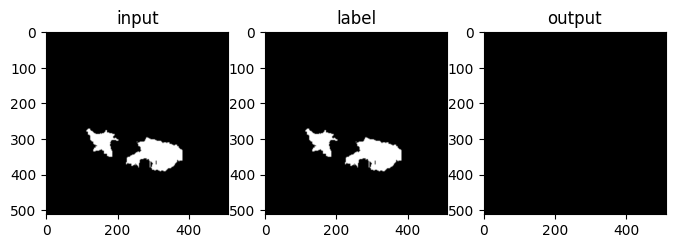

In [ ]:
##
lst_data = os.listdir(os.path.join(result_dir, 'numpy'))

lst_label = [f for f in lst_data if f.startswith('label')]
lst_input = [f for f in lst_data if f.startswith('input')]
lst_output = [f for f in lst_data if f.startswith('output')]

lst_label.sort()
lst_input.sort()
lst_output.sort()

##
id = 0

label = np.load(os.path.join(result_dir,"numpy", lst_label[id]))
input = np.load(os.path.join(result_dir,"numpy", lst_input[id]))
output = np.load(os.path.join(result_dir,"numpy", lst_output[id]))

## 플롯 그리기
plt.figure(figsize=(8,6))
plt.subplot(131)
plt.imshow(input, cmap='gray')
plt.title('input')

plt.subplot(132)
plt.imshow(label, cmap='gray')
plt.title('label')

plt.subplot(133)
plt.imshow(output, cmap='gray')
plt.title('output')

plt.show()
